<center><a target="_blank" href="https://academy.constructor.org/"><img src=https://lh3.googleusercontent.com/d/1EmH3Jks5CpJy0zK3JbkvJZkeqWtVcxhB width="800" style="background:none; border:none; box-shadow:none;" /></a> </center>
<hr />

# <h1 align="center"> Day1: Descriptive Statistics. Exercise Session 2: Law of Large Numbers and Central Limit Theorem </h1> </center>

<p style="margin-bottom:1cm;"></p>

_____

<center>Constructor Academy, 2025</center>



# Verify the Law of Large Numbers

The Law of Large Numbers states that:

“The average of the results obtained from a large number of trials should be close to the expected value and will tend to become closer to the expected value as more trials are performed” (Dekking, Michel. 2005. A Modern Introduction to Probability and Statistics)

We can get a feeling about what it means by applying it to a dataset. Let’s read the Online Retail csv file and examine it:



In [3]:
# reading data from csv
import pandas as pd

# OnlineRetail.csv
data_file = 'https://drive.google.com/uc?export=download&id=1esCoJ06JWPeUyYBqtvMYioAjREQPqfit'
df = pd.read_csv('/Users/szewing/Desktop/Course/CDBootcamp/debbie_to/02_Statistics/day1/OnlineRetail.csv', encoding="unicode_escape")
# if this doesn't work try: pd.read_csv(data_file, encoding="unicode_escape")
print(df.shape)
df.head()


(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


We have 8 columns showing:

- InvoiceNo: invoice number
- StockCode: code unique to the specific item
- Description: description of the item
- Quantity: quantity of items pruchased
- InvoiceDate: date of purchase
- UnitPrice: unit price of the item pruchase
- CustomerID: Unique ID attached to a specific customer
- Country: Country of Purchase

For example, let’s apply the law of Large Number to this dataset. It could translate to:

“The average of the daily retail store income from a large number of days should be close to the expected value (expected daily income) and will tend to become closer to the expected value as more days are taken into account.”

So now let’s investigate if this is true!

## Compute daily sales

The first step is to build a daily sales dataframe from the raw data we loaded.

We start by converting the InvoiceDate column to a `datetime` column:

In [4]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format="%m/%d/%Y %H:%M").dt.date
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France


We only want the day, month, and year from the invoice date, but the original data also contained values for hours and minutes. Conveniently, the date is reformatted as YYYY-MM-DD by default.

Finally, we can compute the total daily sales of the shop:

In [5]:
df['revenue'] = df['UnitPrice'] * df['Quantity']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,16.60


In [6]:
df.groupby('InvoiceDate')['revenue'].sum()

InvoiceDate
2010-12-01    58635.56
2010-12-02    46207.28
2010-12-03    45620.46
2010-12-05    31383.95
2010-12-06    53860.18
                ...   
2011-12-05    57751.32
2011-12-06    54228.37
2011-12-07    75076.22
2011-12-08    81417.78
2011-12-09    32131.53
Name: revenue, Length: 305, dtype: float64

In [6]:
df_totsales = df.groupby('InvoiceDate')['revenue'].agg('sum')
# df_totsales.drop(['InvoiceNo', 'StockCode', 'CustomerID'], axis=1)
df_totsales

InvoiceDate
2010-12-01    58635.56
2010-12-02    46207.28
2010-12-03    45620.46
2010-12-05    31383.95
2010-12-06    53860.18
                ...   
2011-12-05    57751.32
2011-12-06    54228.37
2011-12-07    75076.22
2011-12-08    81417.78
2011-12-09    32131.53
Name: revenue, Length: 305, dtype: float64

In [7]:
df_grouped = df.drop(['CustomerID', 'UnitPrice', 'Country', 'InvoiceNo', 'StockCode'], axis=1).groupby(['InvoiceDate']).sum()
df_grouped

,Description,Quantity,revenue
InvoiceDate,,,
2010-12-01,WHITE HANGING HEART T-LIGHT HOLDERWHITE METAL ...,26814,58635.56
2010-12-02,PORCELAIN ROSE LARGE PORCELAIN ROSE SMALLVICTO...,21023,46207.28
2010-12-03,STAR DECORATION RUSTICWHITE CHRISTMAS STAR DEC...,14830,45620.46
2010-12-05,HOT WATER BOTTLE TEA AND SYMPATHYRETROSPOT HEA...,16395,31383.95
2010-12-06,SET OF 6 T-LIGHTS CACTI CITRONELLA CANDLE FLOW...,21419,53860.18
...,...,...,...
2011-12-05,RABBIT NIGHT LIGHTDOUGHNUT LIP GLOSS 12 MESSAG...,44119,57751.32
2011-12-06,JUMBO BAG BAROQUE BLACK WHITERED GINGHAM ROSE...,29026,54228.37
2011-12-07,JAM MAKING SET PRINTEDRED RETROSPOT SUGAR JAM ...,39612,75076.22


Let's plot a histogram of these daily sales:

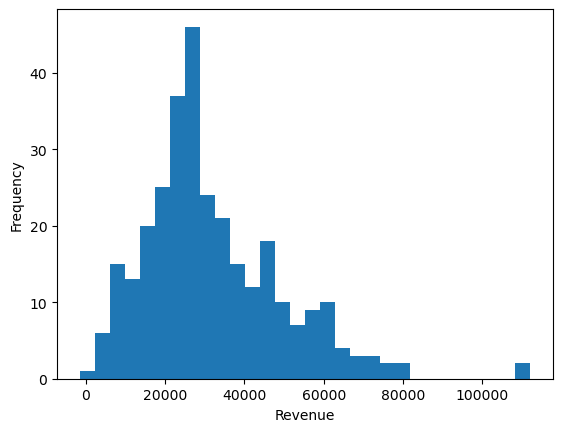

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(df_grouped["revenue"], bins=30)
plt.ylabel('Frequency')
plt.xlabel('Revenue');      # ; -> rm text after the commands
# plt.show()

## Your Turn: Verify the law of large numbers on the daily sales dataframe

Create a list named `avg_daily_revenues` that contains the daily average revenue, taking into account 2, 3, 4, … 300 days, sampled randomly.

**Hint:** Checkout the train-test split exercise (STI_D1_EX1_Train_Test_Split_on_the_Retail_Dataset) for a demonstration on how to sample randomly from a dataframe.

In [9]:
# your code here
import numpy as np

np.mean(df_grouped.sample(n=7, random_state=400)['revenue']).round(2)

np.float64(32130.96)

In [12]:
avg_daily_revenues = [np.mean(df_grouped.sample(n=i, random_state=200)['revenue']).round(2) for i in range(2, 301, 1)]
len(avg_daily_revenues)

299

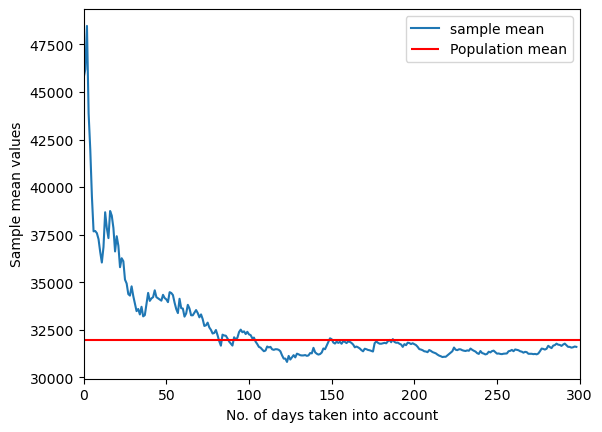

In [ ]:
df_sample = pd.DataFrame({'num_sample': np.arange(2, 301, 1), 'avg_daily_revenues': avg_daily_revenues})

p = df_sample['avg_daily_revenues'].plot(kind='line', label='sample mean')
p.hlines(y=df_grouped['revenue'].mean(), xmin=0, xmax=300, color='r', label='Population mean')
p.set_xlabel('No. of days taken into account')
p.set_ylabel('Sample mean values')
p.set_xlim(0, 300)
p.legend();
#          # where is the population mean?

## Your Turn: Experiment what the Central Limit Theorem means

The Central Limit Theorem states that the normalized sum of independent random variables tends towards a normal distribution as the number of independent random variables increases.

For our daily sales example, that could translate to:

If I compute a large number of the means of daily sales over n days (taken randomly) and plot their histogram, it will look like a gaussian distribution. The more samples I take for calculating the means, the more their distributions will look like a Gaussian.

Let’s test this by computing:

- 10000 sample means of daily sales with sampling size = 1
- 10000 sample means of daily sales with sampling size = 10
- 10000 sample means of daily sales with sampling size = 100
- 10000 sample means of daily sales with sampling size = 1000

and plot the histograms for each distributions. As the number of samples in each mean increases, the distribution should look more and more like a Gaussian.

In [12]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Simulate daily sales data (skewed distribution)
# # np.random.seed(42)
# # daily_sales = np.random.exponential(scale=200, size=10000)

# # Function to generate sample means
# def generate_sample_means(sample_size, n_samples=10000):
#     return [np.mean(np.random.choice(daily_sales, size=sample_size, replace=True))
#             for _ in range(n_samples)]

# # Sample sizes to test
# sample_sizes = [1, 10, 100, 1000]

# # Create plots
# fig, axes = plt.subplots(2, 2, figsize=(12, 8))
# axes = axes.flatten()

# for ax, size in zip(axes, sample_sizes):
#     means = generate_sample_means(size)
#     ax.hist(means, bins=50, color='skyblue', edgecolor='black', density=True)
#     ax.set_title(f"Sample Size = {size}")
#     ax.set_xlabel("Mean Daily Sales")
#     ax.set_ylabel("Density")

# plt.tight_layout()
# plt.show()


Let’s test this by computing:

- 10000 sample means of daily sales with sampling size = 1
- 10000 sample means of daily sales with sampling size = 10
- 10000 sample means of daily sales with sampling size = 100
- 10000 sample means of daily sales with sampling size = 1000


In [21]:
# your code here
import numpy as np
import matplotlib.pyplot as plt

sample_size = [1, 10, 100, 1000, 5000, 10000]
num_sample_mean = 10000
sample_mean = np.zeros((len(sample_size), num_sample_mean))


for i, v in zip([0, 1, 2, 3, 4, 5], sample_size):
    sample_mean[i, :] = [np.mean(df_grouped['revenue'].sample(n=v, replace=True)).round(2) for i in range(num_sample_mean)]

sample_mean

array([[ 6456.44, 34348.75, 40334.97, ..., 27978.41, 26792.76, 72132.79],
       [23635.53, 35412.66, 35013.61, ..., 33680.71, 30339.6 , 34714.35],
       [34413.1 , 32738.7 , 33504.81, ..., 33106.34, 30887.07, 31934.6 ],
       [30454.94, 31299.13, 31244.85, ..., 31138.76, 31969.62, 32548.55],
       [31871.37, 31982.67, 31878.97, ..., 31945.2 , 32238.16, 31619.29],
       [31858.56, 31902.89, 31797.32, ..., 31903.95, 32038.61, 31961.9 ]],
      shape=(6, 10000))

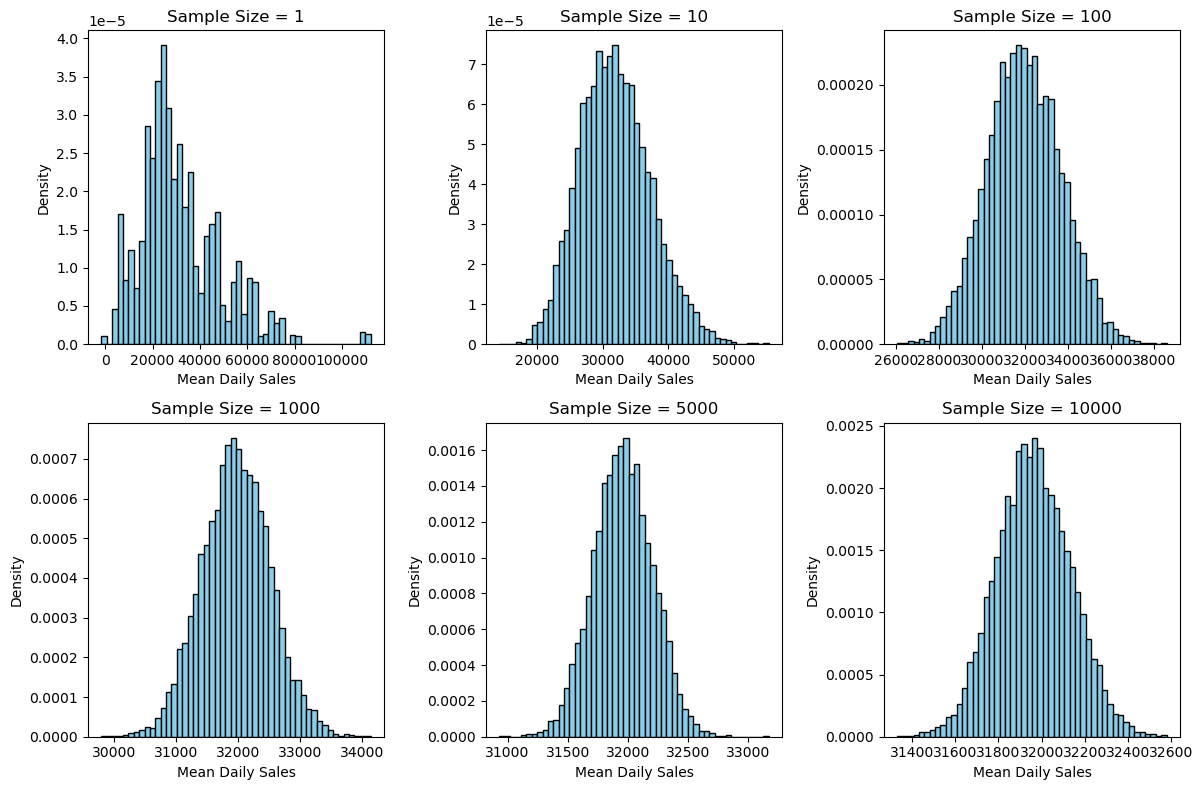

In [21]:
# plot
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs = axs.flatten()

for i in range(6):
    axs[i].hist(sample_mean[i, :], bins=50, color='skyblue', edgecolor='black', density=True)
    axs[i].set_title(f"Sample Size = {sample_size[i]}")
    axs[i].set_xlabel("Mean Daily Sales")
    axs[i].set_ylabel("Density")

plt.tight_layout()

In [22]:
[1, 10, 100, 1000][::-1]

[1000, 100, 10, 1]

In addition I also try:

- 10000 sample means of daily sales with sampling size = 1
- 1000 sample means of daily sales with sampling size = 10
- 100 sample means of daily sales with sampling size = 100
- 10 sample means of daily sales with sampling size = 1000


In [24]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [28]:
for i in range([1, 10, 100, 1000]):
    print(i)

TypeError: 'list' object cannot be interpreted as an integer

Population mean = 31959.82929180328


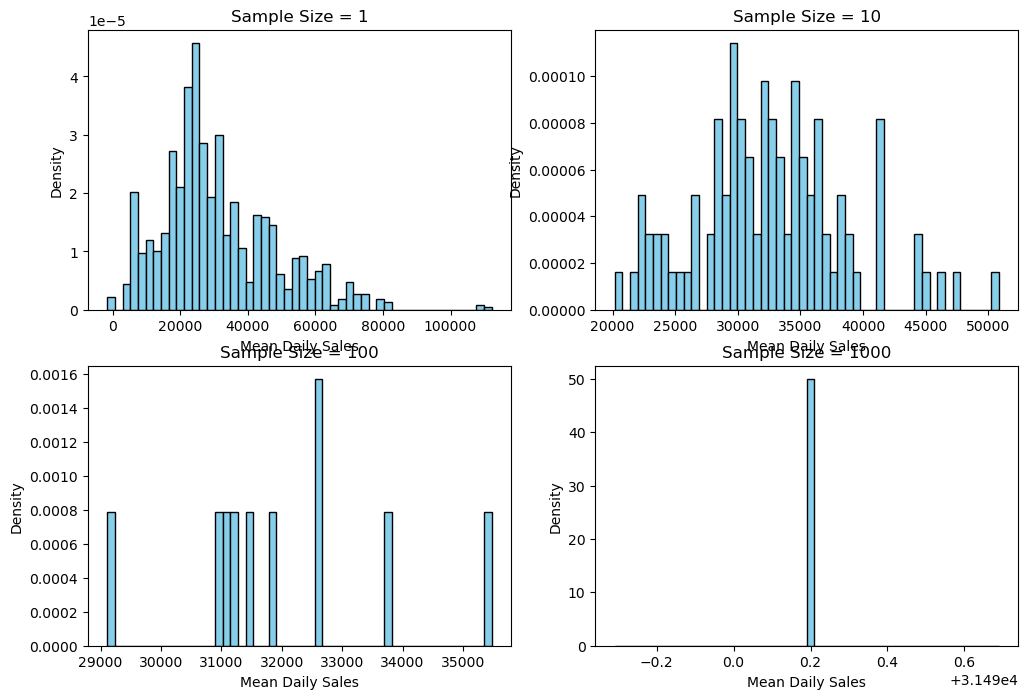

In [ ]:
# your code here
import numpy as np
import matplotlib.pyplot as plt

sample_size = [1, 10, 100, 1000]
num_sample_mean = sample_size[::-1]

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

for i, v in zip(np.arange(len(sample_size)), sample_size):
    # m = num_sample_mean[i]
    # sample_mean = np.zeros((len(m)))
    sample_mean = [np.mean(df_grouped['revenue'].sample(n=v, replace=True)).round(2) for m in range(num_sample_mean[i])]
    axs[i].hist(sample_mean, bins=50, color='skyblue', edgecolor='black', density=True)
    axs[i].set_title(f"Sample Size = {sample_size[i]}")
    axs[i].set_xlabel("Mean Daily Sales")
    axs[i].set_ylabel("Density")
    # axs[i].vlines(np.mean(df_grouped['revenue']), ymin=0, ymax=1e-5, color='r')

print(f"Population mean = {np.mean(df_grouped['revenue'])}")
